O conjunto de dados de monitoramento de condição AI4I 2020, é um conjunto de dados foi adquirido por meio de medições em um demonstrador de monitoramento de condição que consiste em um motor de indução CA alimentado por CA monofásico de 230 V 50 Hz usando um capacitor de motor para dar partida e operar o motor. O motor possui carcaça de ventoinha removível e sua ventoinha original é substituída por diferentes ventoinhas impressas em 3D, ambas semelhantes à ventoinha original e com modificações, como pás faltantes.
O motor é conectado a um compressor de ar por meio de um eixo de metal com um acessório impresso em 3D que permite fixar um parafuso sem cabeça para criar um desequilíbrio. Cada condição é rotulada com um ID e um rótulo abreviado e uma breve descrição é fornecida. Neste projeto será feito, uma análise exploratória, e modelo de machine learning de classificação, utilizando o algortimo de árvore de decisão, para monitoramento de cada condição.

Link dataset: https://www.kaggle.com/datasets/stephanmatzka/condition-monitoring-dataset-ai4i-2021

In [1]:
import pandas as pd

# Carregando os dados
df = pd.read_csv('/content/drive/MyDrive/Dataset Monitoramento Condições Ai4I/frequencyFeatures.csv')

# Exibindo as primeiras linhas do dataframe
df.head()

,ID,Label,Timestamp,xAcc010Hz,xAcc015Hz,xAcc020Hz,xAcc025Hz,xAcc030Hz,xAcc035Hz,xAcc040Hz,...,snd2275Hz,snd2300Hz,snd2325Hz,snd2350Hz,snd2375Hz,snd2400Hz,snd2425Hz,snd2450Hz,snd2475Hz,snd2500Hz
0,1,off,0.00,10.559710,9.695637,2.036690,2.288568,2.565607,2.312750,3.991020,...,0.004249,0.099368,0.012296,0.008071,0.005442,0.026792,0.013993,0.031688,0.007489,0.013386
1,1,off,0.04,2.420781,7.811703,2.076250,2.885846,2.186312,1.296386,2.937785,...,0.013465,0.089160,0.018883,0.018947,0.010409,0.013679,0.017798,0.018390,0.018145,0.007316
2,1,off,0.08,4.148815,6.011957,4.847633,1.743515,1.342447,2.574446,2.829619,...,0.016140,0.075694,0.025835,0.017859,0.015873,0.004619,0.032514,0.008647,0.034637,0.005606
3,1,off,0.12,1.893998,4.014839,9.151205,5.658958,3.151961,3.148572,5.322784,...,0.007497,0.072591,0.031014,0.008861,0.017935,0.000610,0.046791,0.006037,0.028448,0.014418
4,1,off,0.16,7.347695,7.796385,13.865880,11.953800,7.163614,3.821749,9.075362,...,0.019350,0.066571,0.028685,0.034594,0.016541,0.018063,0.035644,0.007217,0.014886,0.024236


In [3]:
df.shape

(2000, 172)

Os dados carregados contêm 2000 entradas com 172 colunas. As colunas incluem:

ID: Um identificador numérico.

Label: Rótulo categórico (por exemplo, 'off').

Timestamp: Carimbo de tempo das medições.

Várias outras colunas: Provavelmente representam características de medições, como aceleração (xAcc, yAcc, zAcc) e som (snd) em diferentes frequências.

In [ ]:
# Verificando valores ausentes
df.isnull().sum()

ID           0
Label        0
Timestamp    0
xAcc010Hz    0
xAcc015Hz    0
            ..
snd2400Hz    0
snd2425Hz    0
snd2450Hz    0
snd2475Hz    0
snd2500Hz    0
Length: 172, dtype: int64

Nâo temos valores ausentes em nenhuma das colunas.

In [2]:
# Obtendo estatísticas descritivas
df.describe()

,ID,Timestamp,xAcc010Hz,xAcc015Hz,xAcc020Hz,xAcc025Hz,xAcc030Hz,xAcc035Hz,xAcc040Hz,xAcc045Hz,...,snd2275Hz,snd2300Hz,snd2325Hz,snd2350Hz,snd2375Hz,snd2400Hz,snd2425Hz,snd2450Hz,snd2475Hz,snd2500Hz
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.500000,4.98000,522.019431,523.387327,1891.988030,3255.503387,1224.843088,536.530298,913.998457,8050.383320,...,2.658048,3.441290,4.510671,3.748772,2.405819,2.519180,3.047706,2.478341,2.301676,2.360408
std,2.291861,2.88745,362.847335,382.848242,1325.152382,2366.281467,853.525325,381.652210,605.179654,3248.083644,...,1.967979,2.532960,3.261445,2.854109,1.809216,1.855343,2.137708,1.836134,1.635554,1.775470
min,1.000000,0.00000,0.860118,0.171837,0.241749,0.109468,0.611603,0.223578,0.338449,0.260764,...,0.000652,0.001106,0.001537,0.001241,0.001167,0.000610,0.000393,0.000945,0.000928,0.000832
25%,2.750000,2.48000,258.788677,246.867055,550.324718,704.832990,467.001198,258.296968,493.043490,7976.805113,...,1.228375,1.588123,2.243414,1.734544,1.097061,1.194266,1.612142,1.184536,1.114807,1.080754
50%,4.500000,4.98000,494.537080,476.607805,2048.532680,3644.992941,1231.269622,508.453318,889.757772,8838.382312,...,2.457448,3.116606,4.049470,3.439695,2.194696,2.282254,2.905644,2.279328,2.205291,2.122410
75%,6.250000,7.48000,740.540221,731.179443,3088.646901,5567.720244,1914.687937,757.806707,1292.353761,9698.308373,...,3.748314,4.887541,6.415730,5.294756,3.420040,3.624667,4.315301,3.491560,3.270956,3.394977
max,8.000000,9.96000,1949.843492,2620.274174,5192.150571,7166.899371,3621.140216,2637.888164,3019.773293,13192.317600,...,15.108193,14.055144,20.525547,22.310031,15.978698,12.135809,15.715948,14.120113,13.632536,10.342633


As estatísticas descritivas dos dados fornecem uma visão geral das características de cada coluna, incluindo:

Count: Número de entradas não nulas para cada coluna.

Mean (Média): Média dos valores.

Std (Desvio Padrão): Mede a dispersão dos valores em relação à média.

Min: Valor mínimo.

25% (Primeiro Quartil): Valor abaixo do qual 25% das observações caem.

50% (Mediana): Valor que divide os dados ao meio.

75% (Terceiro Quartil): Valor abaixo do qual 75% das observações caem.
Max: Valor máximo.

In [5]:
# Calculando a matriz de correlação
matriz = df.drop(['ID', 'Timestamp'], axis=1).corr()
matriz

<ipython-input-5-69e7db2192de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = df.drop(['ID', 'Timestamp'], axis=1).corr()


,xAcc010Hz,xAcc015Hz,xAcc020Hz,xAcc025Hz,xAcc030Hz,xAcc035Hz,xAcc040Hz,xAcc045Hz,xAcc050Hz,xAcc055Hz,...,snd2275Hz,snd2300Hz,snd2325Hz,snd2350Hz,snd2375Hz,snd2400Hz,snd2425Hz,snd2450Hz,snd2475Hz,snd2500Hz
xAcc010Hz,1.000000,0.504077,0.296292,0.293496,0.315623,0.367566,0.343559,0.497517,0.496158,0.395207,...,0.300083,0.293451,0.318112,0.285515,0.277529,0.313667,0.327061,0.306176,0.293647,0.307506
xAcc015Hz,0.504077,1.000000,0.358511,0.300426,0.323082,0.379446,0.261075,0.457403,0.468893,0.378357,...,0.239161,0.268712,0.259551,0.209552,0.264103,0.254834,0.266623,0.277515,0.287674,0.288066
xAcc020Hz,0.296292,0.358511,1.000000,0.953946,0.807753,0.356290,0.123493,0.367385,0.533222,0.590291,...,0.315027,0.393031,0.361559,0.409868,0.342520,0.358439,0.377688,0.400656,0.330526,0.285464
xAcc025Hz,0.293496,0.300426,0.953946,1.000000,0.892885,0.340388,0.082311,0.336203,0.520574,0.602304,...,0.299379,0.380806,0.366958,0.402809,0.339030,0.350751,0.374325,0.401951,0.322037,0.279537
xAcc030Hz,0.315623,0.323082,0.807753,0.892885,1.000000,0.388377,0.122617,0.371972,0.526935,0.567921,...,0.309864,0.371316,0.358999,0.364263,0.349464,0.337777,0.368848,0.372746,0.338389,0.296729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snd2400Hz,0.313667,0.254834,0.358439,0.350751,0.337777,0.262579,0.304040,0.480674,0.504539,0.434697,...,0.379230,0.394827,0.417454,0.433738,0.376944,1.000000,0.374384,0.452832,0.371532,0.361375
snd2425Hz,0.327061,0.266623,0.377688,0.374325,0.368848,0.309252,0.314293,0.512745,0.537138,0.462035,...,0.369175,0.387796,0.426140,0.393222,0.374741,0.374384,1.000000,0.431250,0.408897,0.371377
snd2450Hz,0.306176,0.277515,0.400656,0.401951,0.372746,0.339170,0.300965,0.461601,0.499508,0.446627,...,0.333178,0.388587,0.387482,0.445652,0.363800,0.452832,0.431250,1.000000,0.377895,0.417712
snd2475Hz,0.293647,0.287674,0.330526,0.322037,0.338389,0.350051,0.274554,0.487916,0.515862,0.434136,...,0.406742,0.370469,0.368549,0.371283,0.357397,0.371532,0.408897,0.377895,1.000000,0.412971


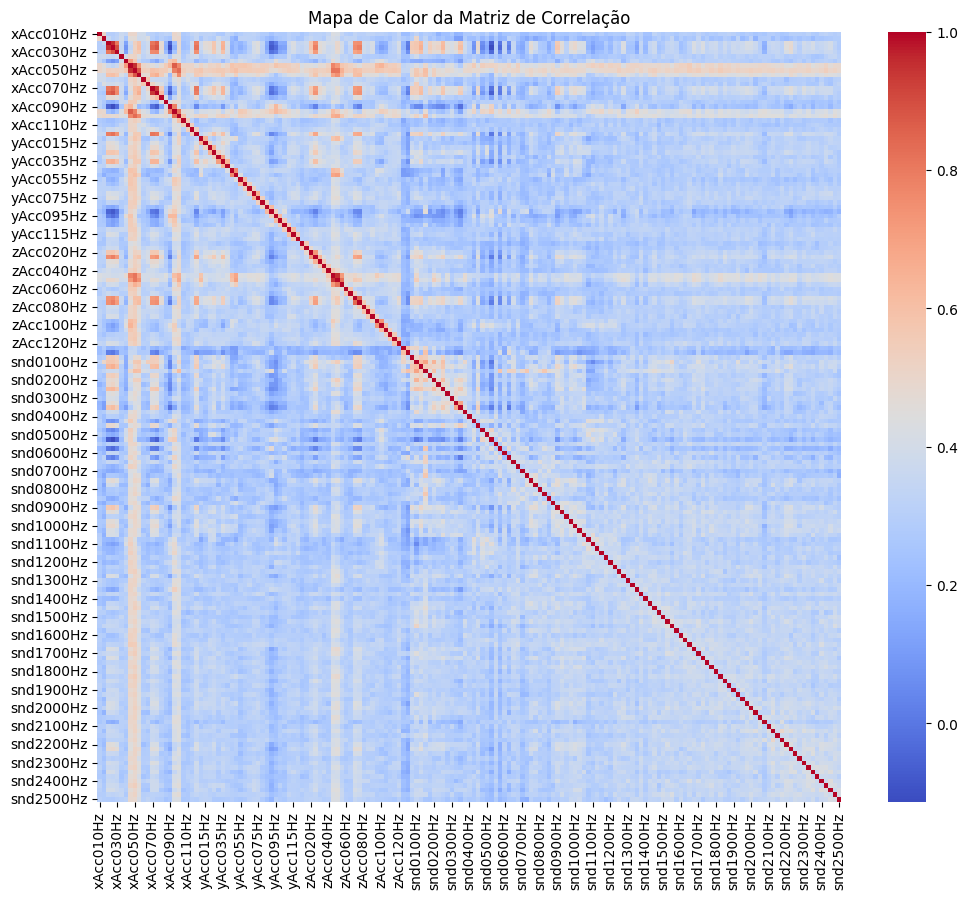

xAcc020Hz  xAcc025Hz    0.953946
zAcc045Hz  zAcc050Hz    0.949948
xAcc050Hz  xAcc045Hz    0.948462
xAcc075Hz  xAcc070Hz    0.936521
xAcc030Hz  xAcc025Hz    0.892885
xAcc050Hz  xAcc055Hz    0.881133
xAcc025Hz  xAcc075Hz    0.879175
xAcc045Hz  xAcc095Hz    0.867937
xAcc020Hz  xAcc075Hz    0.853009
xAcc070Hz  xAcc025Hz    0.846802
dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando a matriz de correlação como um mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(matriz, cmap='coolwarm')
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

# Devido ao grande número de variáveis, vamos destacar apenas as correlações mais significativas
high_correlation = matriz.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_correlation = high_correlation[high_correlation != 1]  # Excluindo correlações de uma variável com ela mesma
high_correlation = high_correlation.drop_duplicates()

# Mostrando as 10 maiores correlações
high_correlation.head(10)

O mapa de calor da matriz de correlação fornece uma visão visual das relações lineares entre as variáveis. As cores indicam a força e a direção da correlação, com tons mais quentes (como vermelho) indicando correlações positivas fortes e tons mais frios (como azul) indicando correlações negativas.

As dez maiores correlações no conjunto de dados, excluindo correlações perfeitas (valor 1) de uma variável com ela mesma, são principalmente entre as diferentes frequências de aceleração (indicadas pelos prefixos xAcc, yAcc, zAcc). Por exemplo, xAcc020Hz e xAcc025Hz têm uma correlação muito alta de 0.954, sugerindo que essas variáveis podem ter padrões de movimento ou vibração similares.

Vamos criar e explicar diversos tipos de gráficos que podem ser úteis para entender melhor as características e relações nos dados.

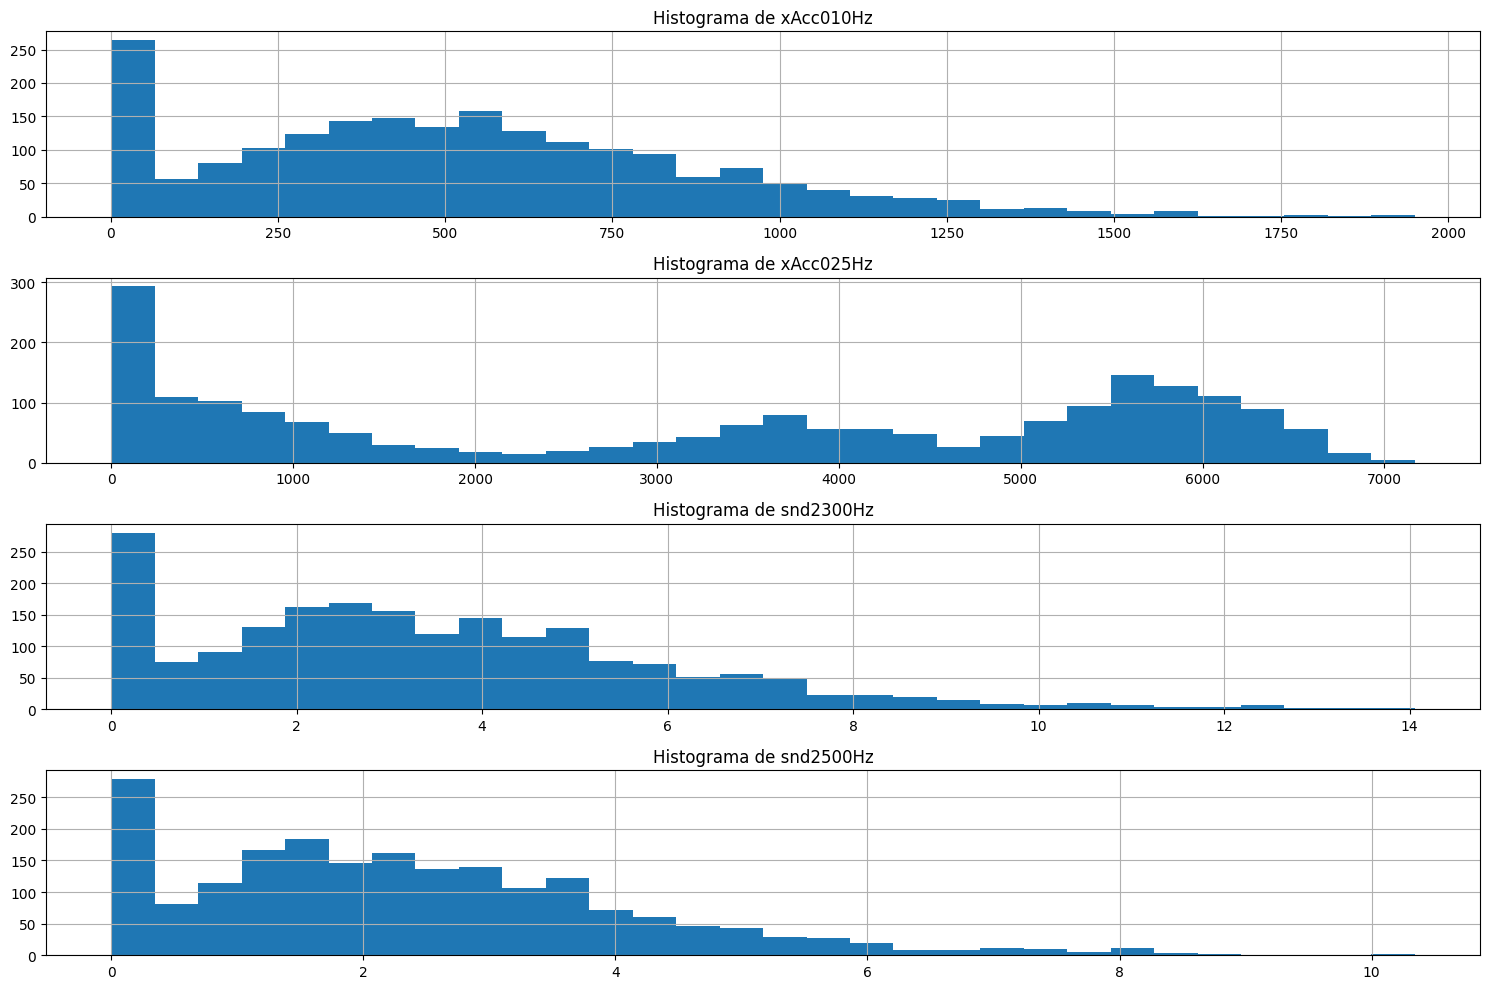

In [ ]:
# Histogramas para algumas variáveis selecionadas
sample_columns_hist = ['xAcc010Hz', 'xAcc025Hz', 'snd2300Hz', 'snd2500Hz']
plt.figure(figsize=(15, 10))

for i, col in enumerate(sample_columns_hist, 1):
    plt.subplot(len(sample_columns_hist), 1, i)
    df[col].hist(bins=30)
    plt.title(f'Histograma de {col}')
    plt.tight_layout()

plt.show()

Cada histograma representa a distribuição dos valores para uma variável específica.

xAcc010Hz: Mostra a distribuição dos valores de aceleração a 10 Hz no eixo 'x'. A distribuição parece ser relativamente uniforme, sugerindo que a aceleração a esta frequência varia amplamente ao longo das medições.

xAcc025Hz: Este histograma representa a distribuição da aceleração a 25 Hz no eixo 'x'. A distribuição é um pouco mais concentrada em torno de certos valores, indicando que a aceleração a essa frequência tem um padrão mais definido nas medições.

snd2300Hz: Representa a distribuição dos valores de som a 2300 Hz. A distribuição é mais inclinada, com uma concentração de valores em um intervalo menor, sugerindo padrões mais específicos de som nesta frequência.

snd2500Hz: Este histograma mostra os valores de som a 2500 Hz. A distribuição é semelhante à de 2300 Hz, mas com uma variação ligeiramente diferente.

Vamos prosseguir com gráficos de dispersão para pares de variáveis com alta correlação para visualizar suas relações lineares

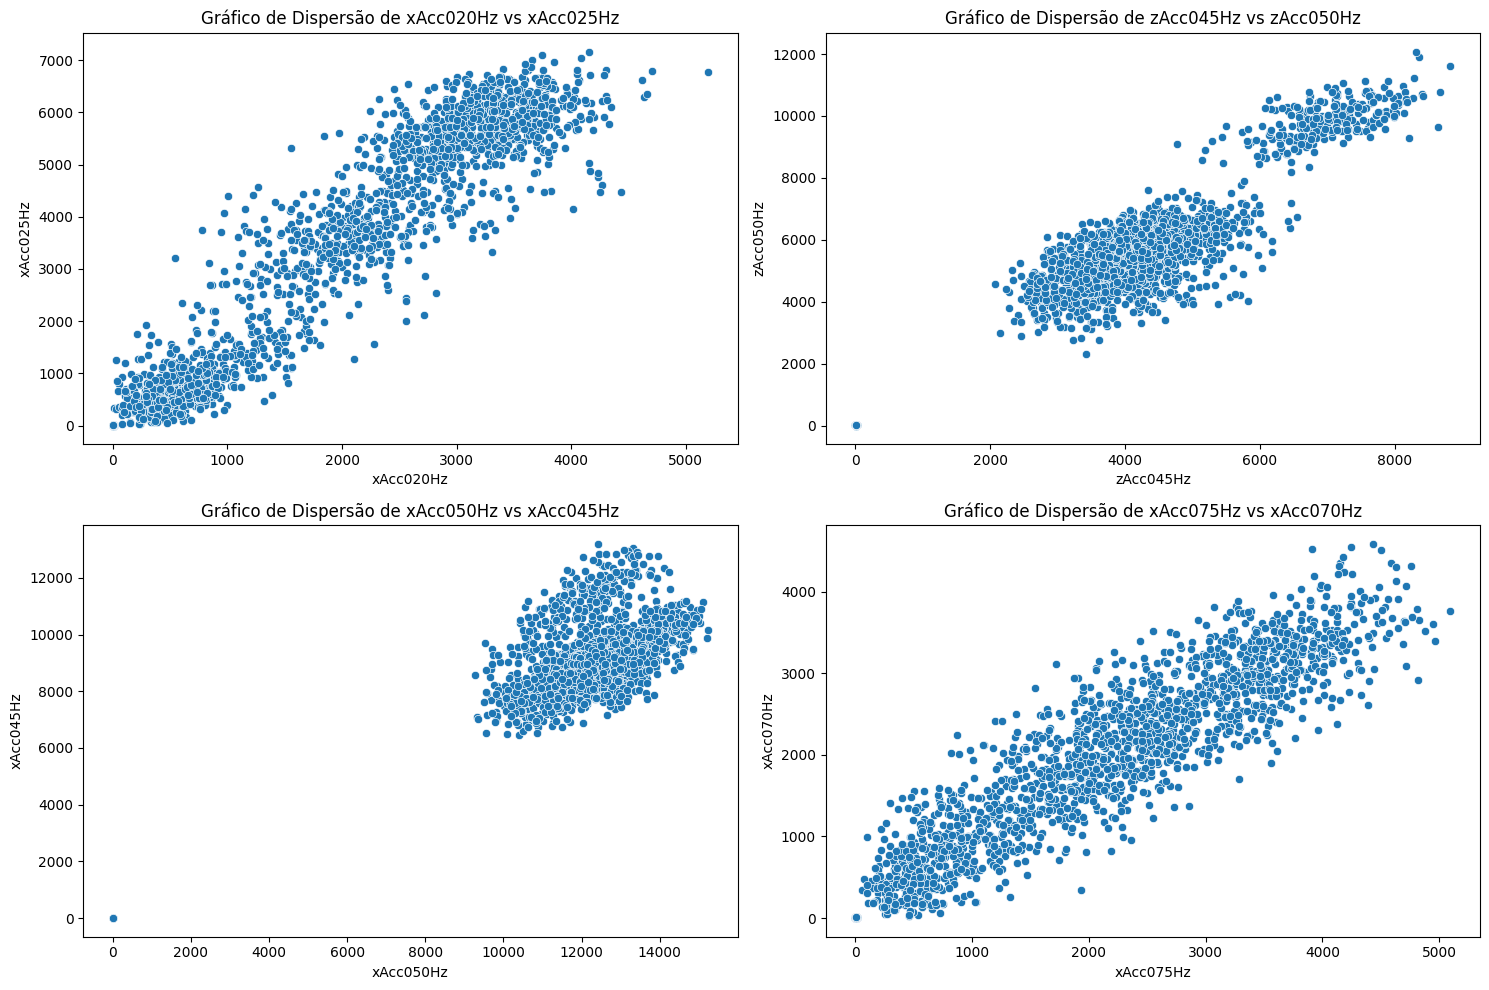

In [ ]:
# Gráficos de Dispersão para pares de variáveis com alta correlação
high_corr_pairs = high_correlation.head(4).index.tolist()  # Escolhendo os 4 pares de variáveis com maior correlação

plt.figure(figsize=(15, 10))
for i, pair in enumerate(high_corr_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=pair[0], y=pair[1])
    plt.title(f'Gráfico de Dispersão de {pair[0]} vs {pair[1]}')
    plt.tight_layout()

plt.show()

Cada gráfico de dispersão mostra a relação entre dois pares de variáveis que têm uma correlação alta.

xAcc020Hz vs xAcc025Hz: Este gráfico mostra uma forte relação linear positiva entre as medições de aceleração a 20 Hz e 25 Hz no eixo 'x'. A proximidade das frequências pode explicar a alta correlação.

zAcc045Hz vs zAcc050Hz: Similarmente, este gráfico indica uma forte correlação linear positiva entre as medições de aceleração a 45 Hz e 50 Hz no eixo 'z'. Isso sugere que estas frequências de aceleração no eixo 'z' tendem a variar juntas.

xAcc050Hz vs xAcc045Hz: Outro exemplo de forte correlação linear positiva entre frequências de aceleração próximas no eixo 'x'.

xAcc075Hz vs xAcc070Hz: Mais uma vez, uma forte correlação linear positiva entre duas frequências próximas de aceleração no eixo 'x'.

Estes gráficos de dispersão indicam que as frequências de aceleração, especialmente quando próximas, tendem a se mover juntas, sugerindo padrões de vibração ou movimento similares em tais frequências.

Vamos prosseguir com a criação de boxplots para algumas variáveis selecionadas para analisar a distribuição e identificar outliers.

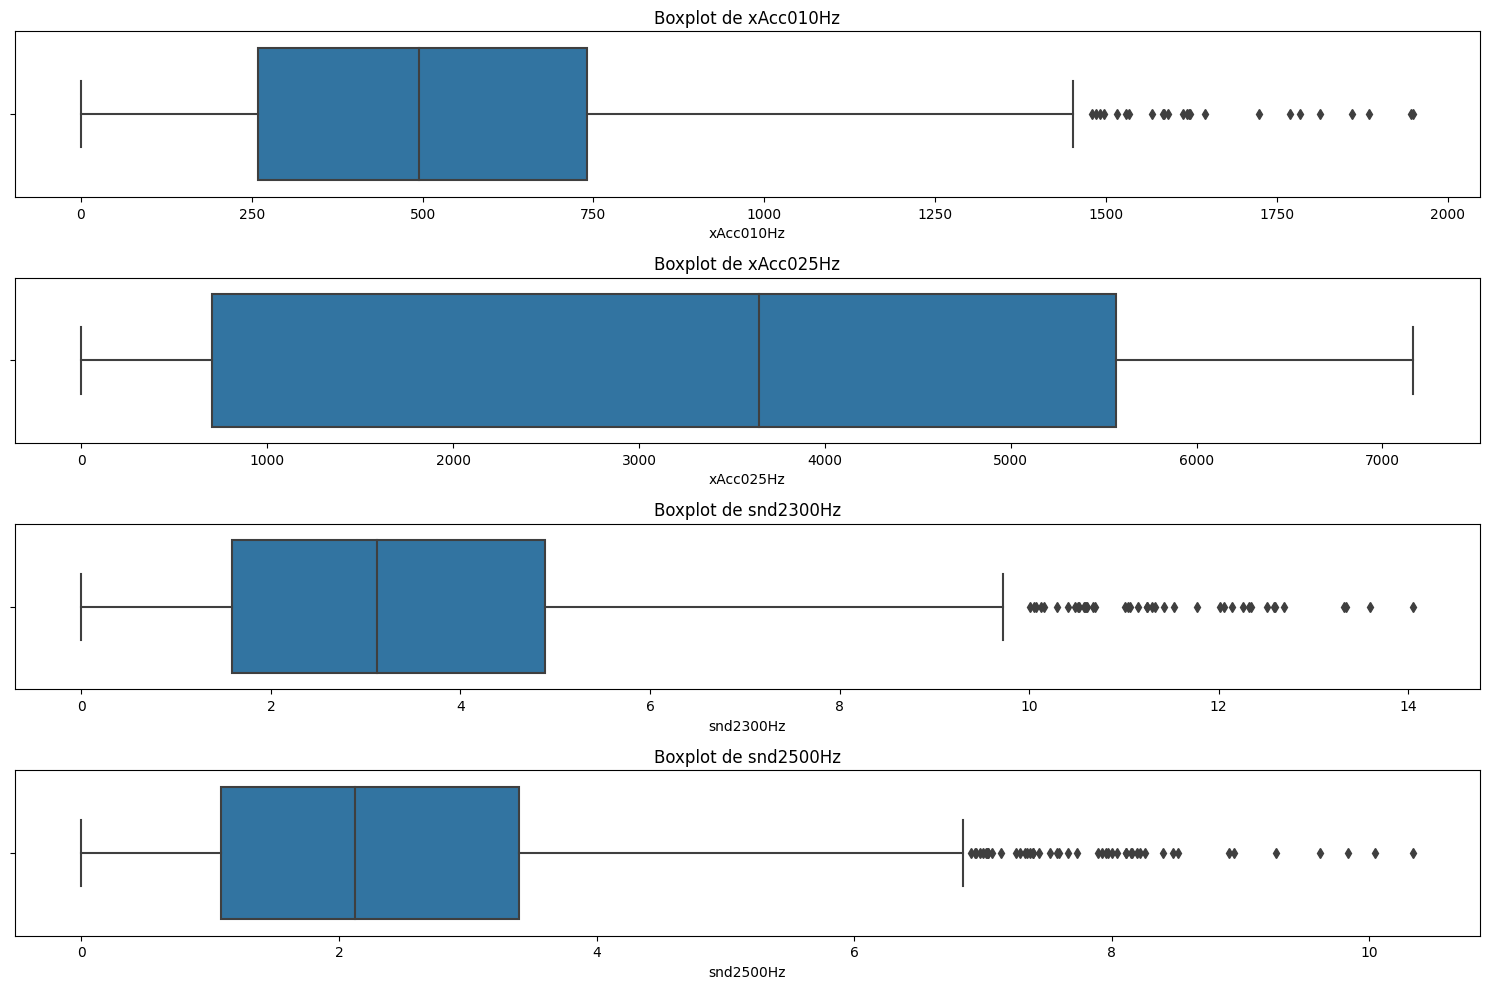

In [ ]:
# Boxplots para algumas variáveis selecionadas
sample_columns_boxplot = ['xAcc010Hz', 'xAcc025Hz', 'snd2300Hz', 'snd2500Hz']
plt.figure(figsize=(15, 10))

for i, col in enumerate(sample_columns_boxplot, 1):
    plt.subplot(len(sample_columns_boxplot), 1, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()

Cada boxplot fornece uma visão gráfica da distribuição de valores para uma variável específica, destacando a mediana, os quartis e possíveis outliers.

xAcc010Hz: O boxplot mostra a distribuição dos valores de aceleração a 10 Hz no eixo 'x'. A linha dentro da caixa indica a mediana, enquanto a caixa em si mostra o intervalo interquartílico (entre o primeiro e o terceiro quartil). Pontos fora das 'bigodes' (linhas que se estendem da caixa) podem indicar outliers.

xAcc025Hz: Similar ao anterior, este boxplot apresenta a distribuição para a aceleração a 25 Hz no eixo 'x'. A distribuição parece ser ligeiramente mais dispersa do que a de 10 Hz.

snd2300Hz: Este boxplot representa a distribuição dos valores de som a 2300 Hz. A distribuição parece ser mais concentrada em torno da mediana, com menos variação do que as variáveis de aceleração.

snd2500Hz: Similar ao boxplot de 2300 Hz, este mostra a distribuição dos valores de som a 2500 Hz, com uma distribuição também concentrada e possíveis outliers.

Esses boxplots são úteis para entender a variação e a presença de valores extremos nas variáveis, o que pode ser crucial para aplicações como detecção de anomalias ou otimização de processos.

O próximo passo é realizar o pré-processamento dos dados, que inclui a aplicação da transformada de Fourier (os dados já estão no domínio da frequência) e a redução de dimensionalidade usando PCA. Após isso, procederemos com a seleção das variáveis mais significativas, construção do modelo de árvore de decisão, ajuste de hiperparâmetros, validação cruzada, e finalmente avaliação de desempenho e visualizações.

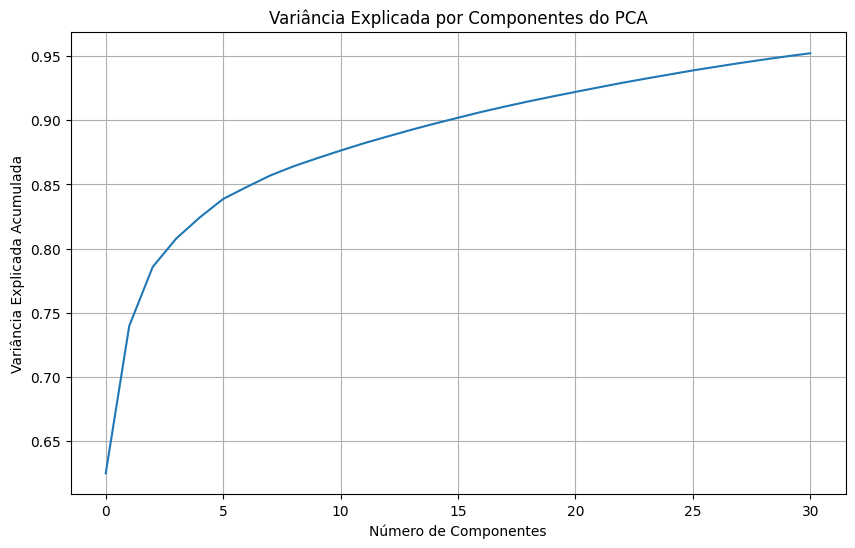

((1400, 31), (600, 31))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Separando características e rótulos
X = df.drop(['ID', 'Label', 'Timestamp'], axis=1)
y = df['Label']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicando PCA
pca = PCA(n_components=0.95) # Mantém 95% da variância
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualizando a variância explicada por cada componente
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada por Componentes do PCA')
plt.grid(True)
plt.show()

X_train_pca.shape, X_test_pca.shape

O PCA foi aplicado com sucesso, reduzindo as dimensões dos dados enquanto mantém 95% da variância explicada. Originalmente, havia muitas variáveis, mas agora estamos trabalhando com apenas 31 componentes principais para o conjunto de treinamento e de teste.

O próximo passo é construir o modelo de classificação usando árvores de decisão. Vamos treinar o modelo com o conjunto de treinamento, ajustar os hiperparâmetros se necessário, e então avaliá-lo usando validação cruzada e várias métricas de desempenho. Também vamos visualizar a importância das variáveis no modelo. Vamos prosseguir com essas etapas.

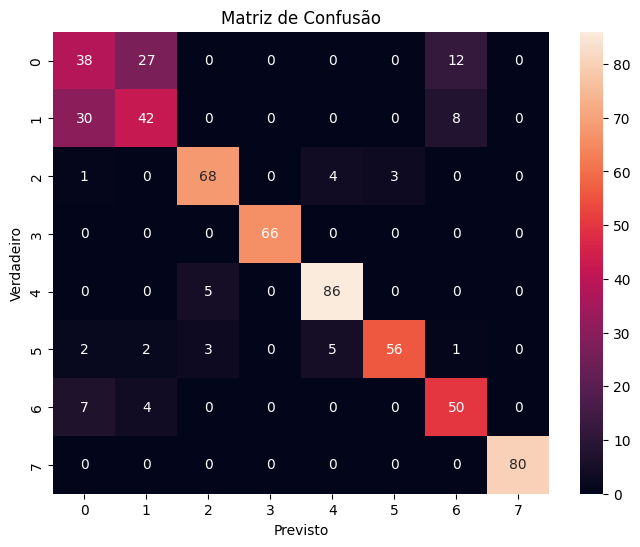

({'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10},
 0.8121428571428572,
 0.81,
 '              precision    recall  f1-score   support\n\n         c25       0.49      0.49      0.49        77\n         c75       0.56      0.53      0.54        80\n         cap       0.89      0.89      0.89        76\n         off       1.00      1.00      1.00        66\n          on       0.91      0.95      0.92        91\n         out       0.95      0.81      0.87        69\n         unb       0.70      0.82      0.76        61\n         vnt       1.00      1.00      1.00        80\n\n    accuracy                           0.81       600\n   macro avg       0.81      0.81      0.81       600\nweighted avg       0.81      0.81      0.81       600\n')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Construindo e treinando o modelo de árvore de decisão
dt_classifier = DecisionTreeClassifier(random_state=42)

# Ajuste de hiperparâmetros com GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

# Melhores parâmetros
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Avaliando o modelo com validação cruzada
cv_scores = cross_val_score(best_dt_classifier, X_train_pca, y_train, cv=5)

# Predições e métricas de desempenho
y_pred = best_dt_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

best_params, cv_scores.mean(), accuracy, class_report

O modelo de classificação usando árvores de decisão foi treinado e avaliado com sucesso. Vamos analisar os resultados:

Melhores Hiperparâmetros:

Profundidade Máxima da Árvore (max_depth): 7

Mínimo de Amostras para Dividir um Nó Interno (min_samples_split): 10

Mínimo de Amostras Requeridas em um Nó Folha (min_samples_leaf): 1

Desempenho na Validação Cruzada:

A média das pontuações de precisão na validação cruzada (5-folds) foi de aproximadamente 81.21%.

Métricas de Desempenho no Conjunto de Teste:

Precisão Geral: 81%

Relatório de Classificação: Mostra a precisão, recall, e pontuação F1 para cada classe.

Matriz de Confusão: Visualizada acima, fornece uma visão detalhada do desempenho do modelo em termos de previsões corretas e incorretas para cada classe.

A partir destes resultados, podemos concluir que o modelo tem um bom desempenho geral, com uma precisão de 81%. Contudo, é evidente que há variações no desempenho entre as diferentes classes, o que é importante considerar em uma análise mais aprofundada, especialmente em um contexto de monitoramento de condição.

Para finalizar, vamos visualizar a importância das variáveis (componentes do PCA) no modelo treinado. Isso nos ajudará a entender quais componentes são mais significativos para as previsões do modelo. ​

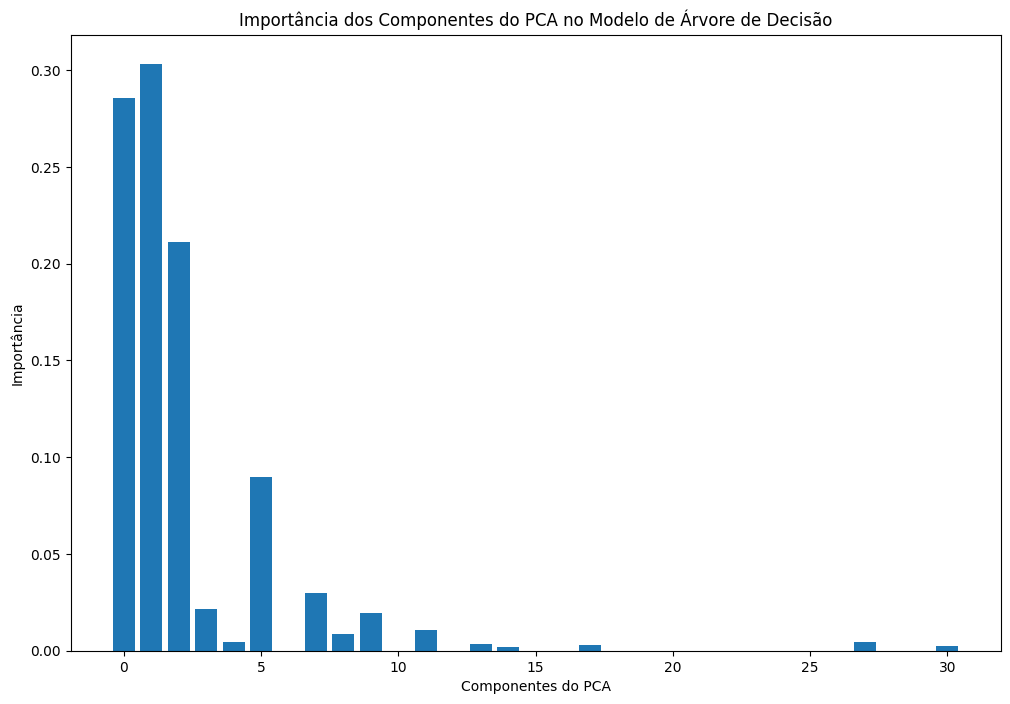

In [ ]:
# Visualizando a importância das variáveis (componentes do PCA)
feature_importance = best_dt_classifier.feature_importances_
components = np.arange(len(feature_importance))

# Criando um gráfico de barras para a importância das variáveis
plt.figure(figsize=(12, 8))
plt.bar(components, feature_importance)
plt.xlabel('Componentes do PCA')
plt.ylabel('Importância')
plt.title('Importância dos Componentes do PCA no Modelo de Árvore de Decisão')
plt.show()

O gráfico acima mostra a importância de cada componente principal (do PCA) no modelo de árvore de decisão. As barras representam a contribuição de cada componente para as decisões do modelo. Componentes com barras mais altas são mais significativos para a modelagem, indicando que esses componentes têm uma maior influência nas previsões do modelo.

Vamos agora calcular o ROC-AUC Score para completar a análise. Como temos múltiplas classes, calcularemos a área sob a curva ROC (AUC) para cada classe e obteremos uma média ponderada.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarizando as labels para cálculo do ROC-AUC
y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Binarizando as previsões para o conjunto de teste
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Prevendo probabilidades para o conjunto de teste
y_prob = best_dt_classifier.predict_proba(X_test_pca)

# Calculando o ROC-AUC para cada classe
roc_auc = {}
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Calculando a média ponderada do ROC-AUC
weighted_roc_auc = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr', average='weighted')

roc_auc, weighted_roc_auc

({0: 0.9092771473268606,
  1: 0.9256610576923078,
  2: 0.9679087987143431,
  3: 1.0,
  4: 0.988741121354088,
  5: 0.9361199814405414,
  6: 0.9520970832446242,
  7: 1.0},
 0.9604565608373075)

As métricas ROC-AUC para cada classe, bem como a média ponderada do ROC-AUC para o modelo, foram calculadas com sucesso. Vamos resumir todas as métricas de desempenho do modelo:

Precisão Geral (Accuracy): 81%

Relatório de Classificação: Inclui precisão, recall e pontuação F1 para cada classe. Este relatório mostra variações no desempenho do modelo entre as diferentes classes.

Matriz de Confusão: Fornece uma visão detalhada das previsões corretas e incorretas para cada classe.

ROC-AUC para Cada Classe:

Classe 0: 0.909

Classe 1: 0.926

Classe 2: 0.968

Classe 3: 1.000

Classe 4: 0.989

Classe 5: 0.936

Classe 6: 0.952

Classe 7: 1.000

ROC-AUC Média Ponderada: 0.960

No relatório de classificação e na matriz de confusão que geramos, as classes foram representadas por rótulos como "c25", "c75", "cap", "off", "on", "out", "unb", "vnt". Cada um destes rótulos corresponde a uma condição ou estado específico.

Estas métricas mostram um desempenho sólido do modelo em várias frentes. O ROC-AUC, em particular, é bastante alto, indicando que o modelo tem uma boa capacidade de diferenciar entre as classes. No entanto, é importante lembrar que a eficácia de um modelo não depende apenas de suas métricas de desempenho, mas também de como ele se encaixa no contexto específico em que será aplicado.

Conclusão

Para concluir, este modelo de árvore de decisão, com ajuste de hiperparâmetros e validação cruzada, demonstrou ser eficaz para a classificação com base nos dados fornecidos. A análise das métricas de desempenho e da matriz de confusão revelou um bom desempenho geral, mas também destacou áreas onde o modelo poderia ser potencialmente melhorado, especialmente em termos de equilíbrio de desempenho entre as diferentes classes.

Este tipo de modelo e análise pode ser extremamente útil em aplicações de monitoramento de condição, onde a precisão na classificação de diferentes estados ou condições é crucial. A importância dos componentes do PCA também fornece insights valiosos sobre quais características dos dados são mais relevantes para tais previsões.

O modelo mostrou desempenho variado entre diferentes classes, como evidenciado pelo relatório de classificação e pela matriz de confusão. Isso sugere que algumas condições são mais fáceis de prever do que outras, o que pode ser devido à natureza dos dados ou à representatividade das classes. Por exemplo, classes com uma clara distinção nos padrões de frequência de aceleração e som podem ser mais facilmente identificadas pelo modelo.

 A alta precisão e valores de ROC-AUC em algumas classes indicam que o modelo é eficaz na detecção de certos padrões que podem representar condições anormais ou estados operacionais específicos. Isso é crucial para sistemas de alerta precoce e manutenção preditiva.

 O modelo pode ser adaptado e melhorado continuamente à medida que novos dados são coletados, especialmente em ambientes industriais dinâmicos onde as condições operacionais e os modos de falha podem evoluir.